# Hello readers muid here 

In this book we will be building multiple Machine learning and see which performs bestfor classification problem --

Lets Start !


In this book we'll be building classificatio model to predict whether the person have transported or not 

Loading Data

In [37]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn import tree

In [21]:
train_df = pd.read_csv("C:\\Users\\muidc\\Downloads\\space_trains.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


EDA Time

In [22]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [24]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- We can see there is uniform numbers of missing data across columns

In [25]:
train_df.corr()

C:\Users\muidc\AppData\Local\Temp\ipykernel_17036\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


There is not high correlation here

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

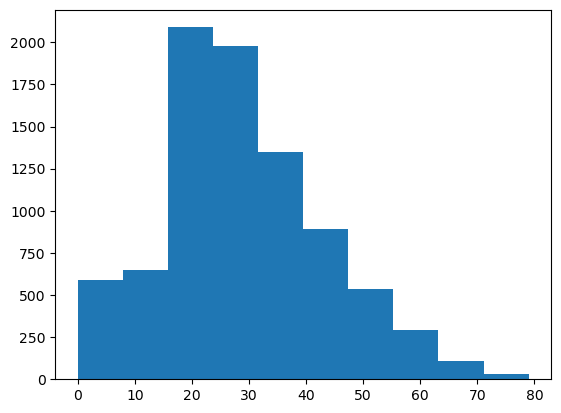

In [27]:
plt.hist(train_df['Age'])

This was giving more accuracy but we'll see stuff down filling accordance to their planet

#temp = train_df[train_df['Age'] < 61]['Age'].mean()
#train_df['Age'] = train_df['Age'].fillna(temp)
#train_df['Age'].isnull()

In [28]:
train_df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [29]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [30]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Most People are from planet - Earth

In [14]:
train_df[(train_df.HomePlanet=='Europa')].Transported.value_counts()

True     1404
False     727
Name: Transported, dtype: int64

FRom Europa over 60% People have transported

In [31]:
train_df[(train_df.HomePlanet=='Earth')].Transported.value_counts()

False    2651
True     1951
Name: Transported, dtype: int64

From Earth the people failed to transport is nearly 60%

In [15]:
train_df[(train_df.HomePlanet=='Mars')].Transported.value_counts()

True     920
False    839
Name: Transported, dtype: int64

From mars its 50-50

In [16]:
train_df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

-Most people are going to TRAPPIST distination

In [17]:
train_df[(train_df.Destination=='TRAPPIST-1e') & (train_df.HomePlanet=='Earth')].Transported.value_counts()

False    1894
True     1207
Name: Transported, dtype: int64

- 1207 People are transported to TRAPPIST from planet EARTH & 1894 failed to transport to trappist

In [18]:
train_df[(train_df.Destination=='55 Cancri e') & (train_df.HomePlanet=='Earth')].Transported.value_counts()

True     348
False    342
Name: Transported, dtype: int64

- transported 348 to Cancri from earth and 342 failed

In [19]:
train_df[(train_df.Destination=='PSO J318.5-22') & (train_df.HomePlanet=='Earth')].Transported.value_counts()

False    357
True     355
Name: Transported, dtype: int64

In [20]:
train_df[(train_df.Destination=='PSO J318.5-22') & (train_df.HomePlanet=='Europa')].Transported.value_counts()

True     14
False     5
Name: Transported, dtype: int64

creating new variable for copy 

In [40]:
new_train_df = train_df.interpolate(method ='linear', limit_direction ='forward')

In [41]:
new_train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [42]:
new_train_df['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [43]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
Coverting text columns to numeric using one hot encoding

In [62]:
new_train_df = pd.get_dummies(new_train_df,columns=['HomePlanet','CryoSleep','VIP','Destination'])

In [63]:
new_train_df.Cabin.describe()

count        7559
unique       5957
top       G/734/S
freq            8
Name: Cabin, dtype: object

Cabin columns has 3 different datas in its columns so we'll spilt that data create 3 different columns out of one for better model performance 

In [64]:
new_train_df[['letter','number','side']] = new_train_df.Cabin.str.split('/',expand=True)

In [65]:
new_train_df.tail()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,...,0,1,0,1,0,0,1,1,0,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,...,1,0,0,0,1,1,0,0,1,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,...,1,0,0,1,0,1,0,0,0,1
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,...,0,1,0,1,0,1,0,1,0,0
8692,9280_02,E/608/S,44.0,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,...,0,1,0,1,0,1,0,0,0,1


We'll convert these important columns to numeric using label encoder

In [66]:
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()

In [67]:
new_train_df['letter'] = encoder.fit_transform(new_train_df['letter'])  
new_train_df['side'] = encoder.fit_transform(new_train_df['side'])
new_train_df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,1,0,1,0,1,0,0,0,1
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,1,0,0,1,0,1,0,0,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0,1,0,1,0,0,1,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0,1,0,1,0,1,0,0,0,1
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,1,0,0,1,0,1,0,0,0,1


Drop null data

In [68]:
new_train_df = new_train_df.dropna()


Defining x and y for model building by dropping columns that not important 

In [69]:
new_x = new_train_df.drop(['PassengerId','Cabin','Name','Transported'],axis=1)

In [70]:
new_x.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
letter                       0
number                       0
side                         0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [34]:
#new_x['number'].dropna()
#new_x = new_x.interpolate(method ='linear')


In [71]:
new_x = new_x.dropna()

In [72]:
new_x

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,letter,number,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,24.0,109.0,9.0,25.0,549.0,44.0,5,0,1,1,0,0,1,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,1,0,0,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,1,0,1,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,5,1,1,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,98,0,0,1,0,1,0,0,1,1,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,6,1499,1,1,0,0,0,1,1,0,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,6,1500,1,1,0,0,1,0,1,0,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,4,608,1,0,1,0,1,0,1,0,1,0,0


In [73]:
new_x['number'].describe()

count     7559
unique    1784
top         82
freq        27
Name: number, dtype: object

In [74]:
new_y = new_train_df[['Transported']]

In [75]:
new_x.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
letter                       0
number                       0
side                         0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
VIP_False                    0
VIP_True                     0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

Applying Logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3)

In [79]:
model = LogisticRegression()

In [80]:
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
model.predict(X_train)

array([False,  True, False, ...,  True, False, False])

In [82]:
model.score(X_train, y_train)

0.7964467964467965

Good our logistic regression model brings us 79% score on training data

In [90]:
model.score(X_test,y_test)

0.7777777777777778

The score on test data is great 77% which is quite near to our training score 

Applying naive bayes and checking models accuracy

In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Will try to apply these three models and check the performance

In [84]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

 --1) Trying  with GaussianNB()

In [87]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7376543209876543
[[ 625  480]
 [ 115 1048]]
0.6858638743455497


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB score Less than logistic regression model

-- 2) Trying with MultinomialNB()

In [88]:
 
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7548500881834215
[[ 662  443]
 [ 113 1050]]
0.7032819825853985


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Better than Gaussian model but still our logistic model does well as compared to MultinomialNb

-- 3) Trying with BernoulliNB()

In [91]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7319223985890653
[[897 208]
 [400 763]]
0.7857878475798146


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-Lets see what happens with decision tree classifier 

In [92]:
#importing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [93]:
Treemodel = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Doing some tunning and fittng the model

In [94]:
Treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [95]:
Treemodel.predict(X_test)

array([ True, False, False, ...,  True, False,  True])

In [97]:
Treemodel.score(X_train, y_train)

0.7251937251937252

In [98]:
Treemodel.score(X_test, y_test)

0.7191358024691358

-- Lets visualize the TREE

In [99]:
plt.figure(dpi=2000)
tree.plot_tree(Treemodel)


[Text(0.5, 0.875, 'x[13] <= 0.5\ngini = 0.5\nsamples = 5291\nvalue = [2650, 2641]'),
 Text(0.25, 0.625, 'x[1] <= 310.0\ngini = 0.439\nsamples = 3432\nvalue = [2314, 1118]'),
 Text(0.125, 0.375, 'x[4] <= 508.5\ngini = 0.475\nsamples = 2493\nvalue = [1526, 967]'),
 Text(0.0625, 0.125, 'gini = 0.498\nsamples = 1851\nvalue = [984, 867]'),
 Text(0.1875, 0.125, 'gini = 0.263\nsamples = 642\nvalue = [542, 100]'),
 Text(0.375, 0.375, 'x[2] <= 1004.5\ngini = 0.27\nsamples = 939\nvalue = [788, 151]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 878\nvalue = [754, 124]'),
 Text(0.4375, 0.125, 'gini = 0.493\nsamples = 61\nvalue = [34, 27]'),
 Text(0.75, 0.625, 'x[9] <= 0.5\ngini = 0.296\nsamples = 1859\nvalue = [336, 1523]'),
 Text(0.625, 0.375, 'x[6] <= 3.5\ngini = 0.084\nsamples = 996\nvalue = [44, 952]'),
 Text(0.5625, 0.125, 'gini = 0.014\nsamples = 572\nvalue = [4, 568]'),
 Text(0.6875, 0.125, 'gini = 0.171\nsamples = 424\nvalue = [40, 384]'),
 Text(0.875, 0.375, 'x[7] <= 602.5\ngini = 0.44

--Lets Apply Random Forrest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
randommodel = RandomForestClassifier(n_estimators=550,random_state=26,max_depth=8,max_features='sqrt')
# Doing some tunning and fitting the model

In [102]:
randommodel.fit(X_train, y_train)

C:\Users\muidc\AppData\Local\Temp\ipykernel_17036\1324052562.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randommodel.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=550, random_state=26)

In [103]:
randommodel.predict(X_test)

array([ True,  True, False, ...,  True,  True,  True])

In [106]:
randommodel.score(X_train, y_train)

0.8431298431298432

In [107]:
randommodel.score(X_test,y_test)

0.7870370370370371

# Other techniques - SVC, GBC etc....

Importing model

In [125]:
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier


Perameter tunning of each model  

In [111]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=100, random_state=2)
bc = BaggingClassifier(n_estimators=100, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=2)

In [112]:
clfs = {'SVC':svc,
        'KN':knc,
        'AdaBoost':abc,
        'BC':bc,
        'ETC':etc,
        'GBDT':gbdt}

In [113]:
def train_classifier(clf,X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

-- Support Vector Classifier

In [114]:
train_classifier(svc,X_train, y_train, X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.48721340388007056, 0.0)

-- KNeighborsClassifier()

In [115]:
train_classifier(knc,X_train, y_train, X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(0.7407407407407407, 0.7324171382376717)

--AdaBoostClassifier

In [116]:
train_classifier(abc,X_train, y_train, X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7760141093474426, 0.76778413736713)

--BaggingClassifier  

In [117]:
train_classifier(bc,X_train, y_train, X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7817460317460317, 0.8069852941176471)

-- ExtraTreesClassifier

In [123]:
train_classifier(etc,X_train, y_train, X_test, y_test)

C:\Users\muidc\AppData\Local\Temp\ipykernel_17036\2281815598.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


(0.7892416225749559, 0.8122151321786691)

-- GradientBoostingClassifier

In [119]:
train_classifier(gbdt,X_train, y_train, X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7892416225749559, 0.7764326069410815)

# Thanks reader for going through the book 